### Driven Data Pump it Up Challenge:

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#import os
#os.environ["PROJ_LIB"] = "C:\\Users\\rtalebiz\\AppData\\Local\\Continuum\\anaconda3\\Library\\share"
#from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
#Reading the df files and assigning them to variables - we have 2 csv files
training_label = pd.read_csv('data/training set labels.csv')
training_values_df = pd.read_csv('data/training set values.csv')

In [3]:
# Merge training_values_df and training_label dfs to have one df
train_df = pd.merge(training_values_df, training_label, on = "id")

In [4]:
# Deleting training_label df
del training_label

In [5]:
# Creating a copy of train df so making changes would not alter the initial dataset
df = train_df.copy()

#### Let's look at our data using .info(), .shape and .head() methods

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [7]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### We notice that some of our features like *(funder, installer, subvillage, public_meeting, scheme_management, scheme_name and permit)* have missing values. We need to look at these features and decide if they have a vitale role in predicting which pump is likely to stop working. Also, some of these features have duplicate data like *funder and installer* so I would likely drop one of them.

In [8]:
df.shape

(59400, 41)

#### Our dataset has 59,400 datapoints and 41 features. Now let's look at a few datapoints using .head()

In [9]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### I'll be looking at some of these features and dropping the ones with duplicate data as well as figuring out a way to fill all the NaNs and/or 0s

#### Now let's look at the amount of each functional type pumps in our dataset

In [10]:
# The count of each fuctional type of the pumps in status_group so that we will understand the functional scenario 
# of the pump status
print('Count of each functional type:' + '\n' + str(df.status_group.value_counts()))
print('\n' + 'Percent of each functional type:' + '\n' + str(df.status_group.value_counts(normalize=True)))

Count of each functional type:
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Percent of each functional type:
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


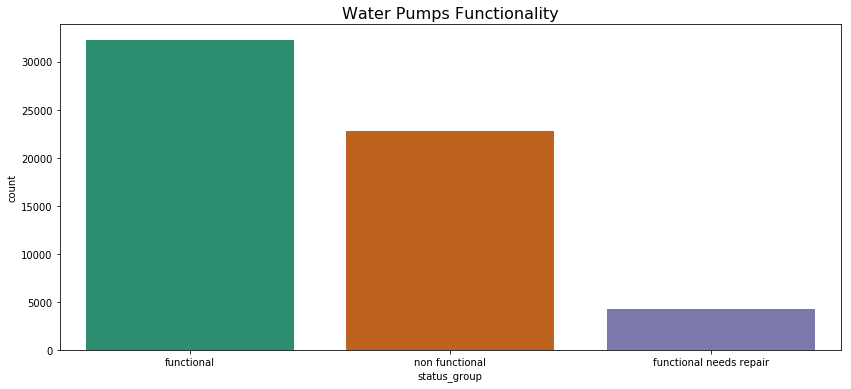

In [11]:
plt.figure(figsize=(14,6))
plt.title("Water Pumps Functionality",fontsize=16)
sns.countplot(x=df['status_group'], data=df, palette='Dark2')

#### By the above figures, we can roughly estimate that there is 54.31% chance that if we take a random pump in the data to be a functional pump.

### Now let's separate our Numerical and Categorical features and visualize some of the most sensitive columns

In [12]:
sensitive_num_features = [
    'amount_tsh',
    'gps_height',
    'longitude',
    'latitude',
    'population',
    'construction_year'
]

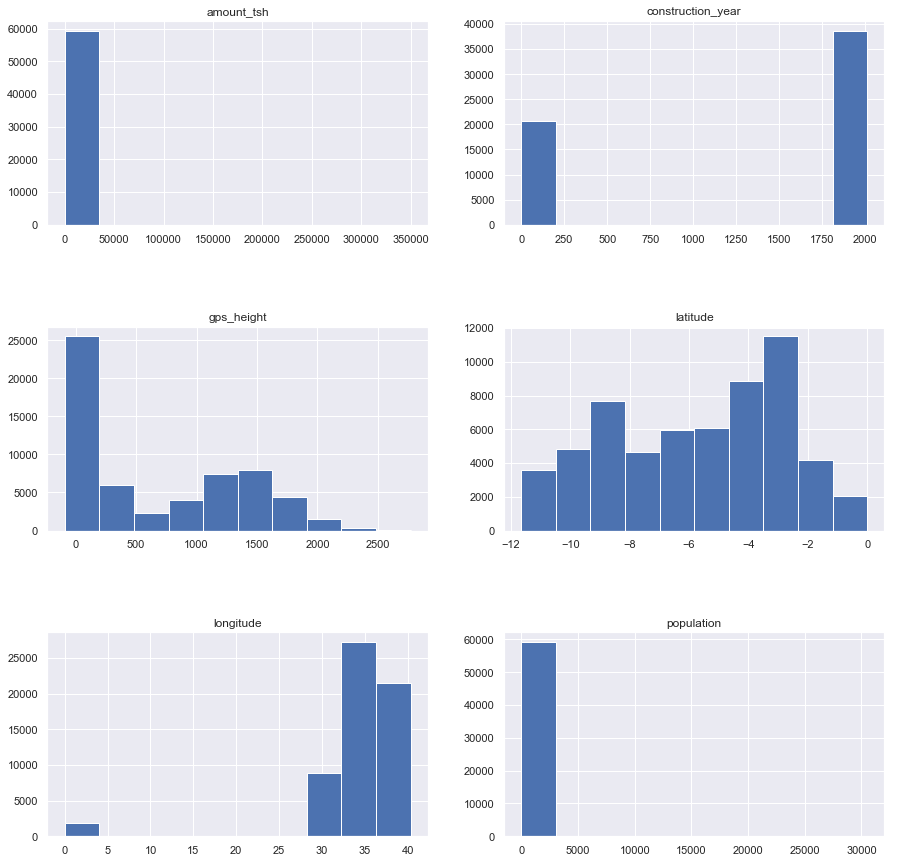

In [13]:
sns.set()
df.loc[:,sensitive_num_features].hist()
fig = plt.gcf()
fig.set_size_inches(15,15)
fig.subplots_adjust(wspace=0.2, hspace=0.5)

### Let's look at numerical values

In [14]:
#df[df['construction_year'] == 0]

In [15]:
df['construction_year'].value_counts(normalize=True) * 100

0       34.863636
2010     4.452862
2008     4.398990
2009     4.264310
2000     3.520202
2007     2.671717
2006     2.476431
2003     2.164983
2011     2.114478
2004     1.890572
2012     1.824916
2002     1.809764
1978     1.745791
1995     1.707071
2005     1.702020
1999     1.648148
1998     1.626263
1990     1.606061
1985     1.590909
1980     1.365320
1996     1.365320
1984     1.311448
1982     1.252525
1994     1.242424
1972     1.191919
1974     1.138047
1997     1.084175
1992     1.077441
1993     1.023569
2001     0.909091
1988     0.877104
1983     0.821549
1975     0.735690
1986     0.730640
1976     0.696970
1970     0.691919
1991     0.545455
1989     0.531987
1987     0.508418
1981     0.400673
1977     0.340067
1979     0.323232
1973     0.309764
2013     0.296296
1971     0.244108
1960     0.171717
1967     0.148148
1963     0.143098
1968     0.129630
1969     0.099327
1964     0.067340
1962     0.050505
1961     0.035354
1965     0.031987
1966     0.028620
Name: cons

In [16]:
#df[df['population'] == 0]

In [17]:
df['population'].value_counts(normalize=True) * 100

0       35.994949
1       11.826599
200      3.265993
150      3.185185
250      2.829966
300      2.484848
100      1.929293
50       1.917508
500      1.698653
350      1.659933
120      1.542088
400      1.304714
60       1.188552
30       1.053872
40       0.929293
80       0.897306
450      0.840067
20       0.777778
600      0.737374
230      0.653199
75       0.486532
1000     0.468013
800      0.452862
90       0.446128
130      0.444444
25       0.429293
320      0.419192
35       0.412458
360      0.373737
140      0.361953
          ...    
8848     0.001684
628      0.001684
4520     0.001684
468      0.001684
693      0.001684
725      0.001684
789      0.001684
821      0.001684
5300     0.001684
3127     0.001684
2345     0.001684
3031     0.001684
886      0.001684
392      0.001684
424      0.001684
2807     0.001684
726      0.001684
694      0.001684
2569     0.001684
4788     0.001684
662      0.001684
4660     0.001684
406      0.001684
1032     0.001684
1160     0

In [18]:
df['amount_tsh'].value_counts(normalize=True) * 100

0.00         70.099327
500.00        5.222222
50.00         4.161616
1000.00       2.505051
20.00         2.462963
200.00        2.053872
100.00        1.373737
10.00         1.356902
30.00         1.250842
2000.00       1.185185
250.00        0.957912
300.00        0.937710
5000.00       0.757576
5.00          0.632997
25.00         0.599327
3000.00       0.562290
1200.00       0.449495
1500.00       0.331650
6.00          0.319865
600.00        0.296296
4000.00       0.262626
2400.00       0.244108
2500.00       0.234007
6000.00       0.210438
7.00          0.116162
8000.00       0.102694
750.00        0.099327
40.00         0.099327
10000.00      0.095960
12000.00      0.085859
               ...    
16000.00      0.003367
16300.00      0.003367
800.00        0.003367
11000.00      0.003367
590.00        0.003367
520.00        0.003367
26000.00      0.003367
13000.00      0.003367
9.00          0.001684
170000.00     0.001684
200000.00     0.001684
900.00        0.001684
0.25       

In [19]:
df['gps_height'].value_counts(normalize=True) * 100

 0       34.407407
-15       0.101010
-16       0.092593
-13       0.092593
-20       0.087542
 1290     0.087542
-14       0.085859
 303      0.085859
-18       0.082492
-19       0.079125
 1269     0.077441
 1295     0.077441
 1304     0.075758
-23       0.075758
 280      0.074074
 1538     0.074074
 1286     0.074074
-8        0.074074
-17       0.074074
 1332     0.072391
 320      0.072391
 1317     0.070707
 1293     0.070707
 1319     0.070707
 1359     0.070707
 1264     0.070707
 1288     0.070707
 1401     0.070707
 1303     0.070707
-27       0.070707
           ...    
 2506     0.001684
 2023     0.001684
-53       0.001684
 2364     0.001684
 2332     0.001684
 2402     0.001684
 2236     0.001684
 2420     0.001684
 2291     0.001684
 2407     0.001684
 2080     0.001684
 2250     0.001684
 591      0.001684
 2378     0.001684
 2535     0.001684
 2614     0.001684
 2484     0.001684
 2450     0.001684
 2072     0.001684
 2286     0.001684
 2567     0.001684
 2322     0.

In [20]:
df['longitude'].value_counts(normalize=True) * 100

0.000000     3.050505
37.540901    0.003367
33.010510    0.003367
39.093484    0.003367
32.972719    0.003367
33.006275    0.003367
39.103950    0.003367
37.542785    0.003367
36.802490    0.003367
39.098374    0.003367
33.090347    0.003367
33.005032    0.003367
32.978062    0.003367
39.088875    0.003367
31.619530    0.003367
39.093095    0.003367
39.105307    0.003367
32.936689    0.003367
32.987511    0.003367
39.090880    0.003367
37.314250    0.003367
32.984790    0.003367
39.091434    0.003367
37.274352    0.003367
32.919861    0.003367
37.530515    0.003367
32.955597    0.003367
39.098514    0.003367
32.988560    0.003367
32.987670    0.003367
               ...   
36.831815    0.001684
31.530352    0.001684
35.455622    0.001684
37.672581    0.001684
29.964104    0.001684
34.862237    0.001684
37.663466    0.001684
37.128824    0.001684
38.766058    0.001684
38.710520    0.001684
40.117029    0.001684
34.672962    0.001684
39.433604    0.001684
35.901580    0.001684
37.532216 

#### As we can see above, we have 3% counts of the value 0 for longitude which is not correct for Tanzania. [Map of Tanzania with latitude and longitude](https://www.worldatlas.com/img/areamap/44fb0cbaa5eb7ba2770b00485a23d97a.gif). You can also find more information about Tanzania using this [link](https://www.worldatlas.com/webimage/countrys/africa/tz.htm)

In [21]:
df['latitude'].value_counts(normalize=True) * 100

-2.000000e-08    3.050505
-6.985842e+00    0.003367
-3.797579e+00    0.003367
-6.981884e+00    0.003367
-7.104625e+00    0.003367
-7.056923e+00    0.003367
-7.175174e+00    0.003367
-6.990731e+00    0.003367
-6.978755e+00    0.003367
-6.994704e+00    0.003367
-2.494546e+00    0.003367
-6.964258e+00    0.003367
-2.506590e+00    0.003367
-6.990549e+00    0.003367
-2.485227e+00    0.003367
-2.494353e+00    0.003367
-6.962475e+00    0.003367
-6.989456e+00    0.003367
-6.957328e+00    0.003367
-6.958716e+00    0.003367
-6.992611e+00    0.003367
-6.991294e+00    0.003367
-7.177155e+00    0.003367
-2.501627e+00    0.003367
-1.793342e+00    0.003367
-7.102004e+00    0.003367
-2.467137e+00    0.003367
-2.516619e+00    0.003367
-7.095131e+00    0.003367
-6.981326e+00    0.003367
                   ...   
-1.820702e+00    0.001684
-3.849252e+00    0.001684
-4.624770e+00    0.001684
-6.405513e+00    0.001684
-1.530104e+00    0.001684
-3.482213e+00    0.001684
-6.345435e+00    0.001684
-3.914628e+0

In [22]:
df[df['amount_tsh']==0].groupby(df['quantity']).size()

quantity
dry              5516
enough          21103
insufficient    10914
seasonal         3411
unknown           695
dtype: int64

### We see above that the we have *'amount_tsh'* == 0 (amount water available to waterpoint) and this doesn't make sense when the *'quantity'* is not 'dry'. I'll assume that 0 value in *'amount_tsh'* means we are missing values in this feature and we need to handle it.

### Now let's compare the *status_group* feature with other numerical features to see if we can find a trend

In [23]:
df[['amount_tsh']].groupby(df['status_group']).size()

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64

In [24]:
# We can see that there are 41639 0's in amount_tsh column. Since these 0's might cause some 
#issues later, we need to change them to NaN values and then replace the NaN values 
#with transform("mean") and transform("median") - This is also true for population and gps_height
df['amount_tsh'].replace(0.0, np.nan, inplace=True)
df['gps_height'].replace(0.0, np.nan, inplace=True)
df['population'].replace(0.0, np.nan, inplace=True)
df['longitude'].replace(0.0, np.nan, inplace=True)
df['construction_year'].replace(0.0, np.nan, inplace=True)

In [25]:
df["amount_tsh"].fillna(df.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
df["amount_tsh"].fillna(df.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
df["amount_tsh"].fillna(df["amount_tsh"].median(), inplace=True)
df["gps_height"].fillna(df.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
df["gps_height"].fillna(df.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
df["gps_height"].fillna(df["gps_height"].mean(), inplace=True)
df["population"].fillna(df.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
df["population"].fillna(df.groupby(['region'])["population"].transform("median"), inplace=True)
df["population"].fillna(df["population"].median(), inplace=True)
df["longitude"].fillna(df.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
df["longitude"].fillna(df.groupby(['region'])["longitude"].transform("mean"), inplace=True)
df["construction_year"].fillna(df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df["construction_year"].median(), inplace=True)

In [26]:
list(df.select_dtypes(object))

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

In [27]:
df['funder'].unique()

array(['Roman', 'Grumeti', 'Lottery Club', ..., 'Dina', 'Brown', 'Samlo'],
      dtype=object)

In [28]:
df['lga'].unique()

array(['Ludewa', 'Serengeti', 'Simanjiro', 'Nanyumbu', 'Karagwe',
       'Mkinga', 'Shinyanga Rural', 'Kahama', 'Tabora Urban', 'Mkuranga',
       'Namtumbo', 'Maswa', 'Siha', 'Meatu', 'Sumbawanga Rural', 'Njombe',
       'Ukerewe', 'Bariadi', 'Same', 'Kigoma Rural', 'Moshi Rural',
       'Lindi Rural', 'Rombo', 'Chamwino', 'Bagamoyo', 'Mafia',
       'Arusha Rural', 'Kyela', 'Kondoa', 'Kilolo', 'Kibondo', 'Makete',
       'Singida Rural', 'Masasi', 'Rungwe', 'Moshi Urban', 'Geita',
       'Mbulu', 'Bukoba Rural', 'Muheza', 'Lushoto', 'Meru', 'Iramba',
       'Kilombero', 'Mbarali', 'Kasulu', 'Bukoba Urban', 'Korogwe',
       'Bukombe', 'Morogoro Rural', 'Kishapu', 'Musoma Rural',
       'Sengerema', 'Iringa Rural', 'Muleba', 'Dodoma Urban', 'Ruangwa',
       'Hanang', 'Misenyi', 'Missungwi', 'Songea Rural', 'Tanga',
       'Tunduru', 'Hai', 'Mwanga', 'Chato', 'Biharamulo', 'Ileje',
       'Mpwapwa', 'Mvomero', 'Bunda', 'Kiteto', 'Longido', 'Urambo',
       'Mbozi', 'Sikonge', 'Ilala',

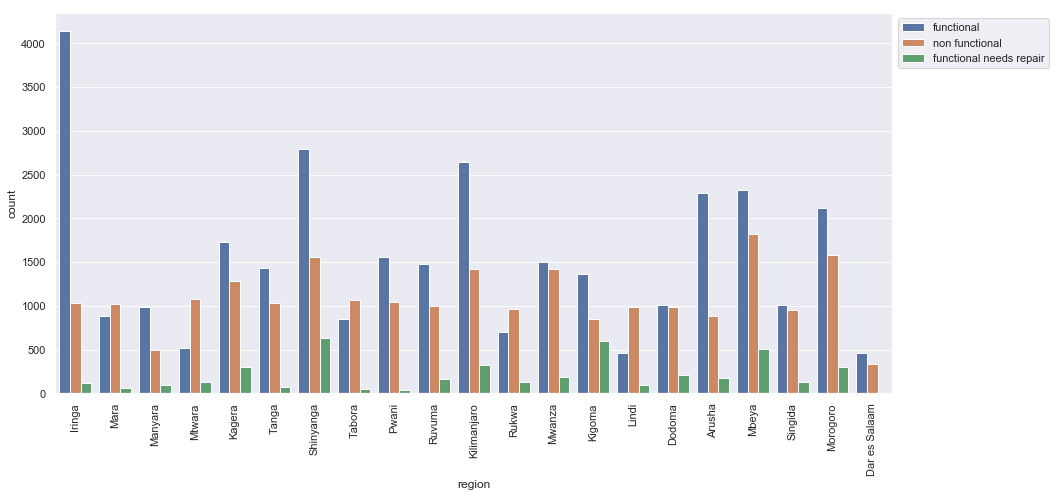

In [29]:
plt.figure(figsize=(15,7))
_ = sns.countplot(data=df,x='region',hue='status_group')
_.set_xticklabels(_.get_xticklabels(),rotation=90)
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [30]:
df['basin'].unique()

array(['Lake Nyasa', 'Lake Victoria', 'Pangani',
       'Ruvuma / Southern Coast', 'Internal', 'Lake Tanganyika',
       'Wami / Ruvu', 'Rufiji', 'Lake Rukwa'], dtype=object)

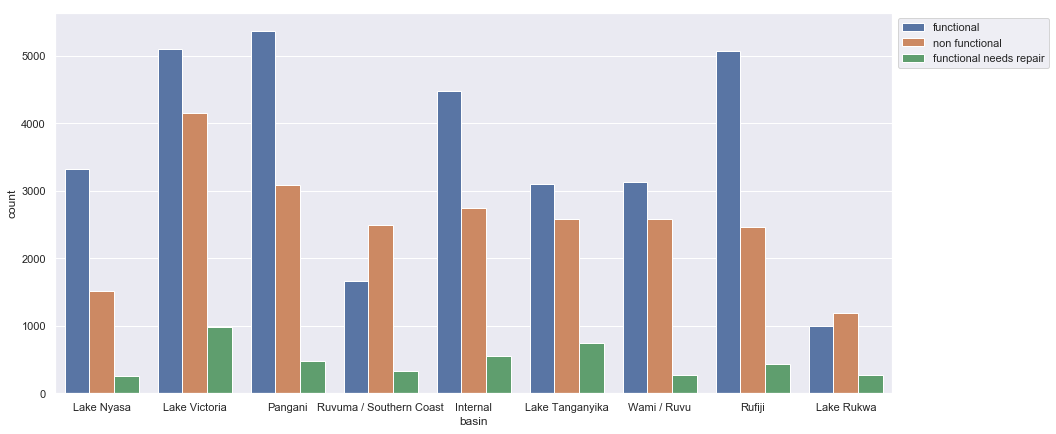

In [31]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='basin',hue='status_group')
plt.legend(bbox_to_anchor=(1,1), loc=2)